In [ ]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!ls

02..ipynb                  TextAnalysisResearch.ipynb
AdaboostDecisionTree.ipynb all_tickets.csv
Readme.md                  analysis.ipynb


In [9]:
df = pd.read_csv("all_tickets.csv")

In [10]:
df.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [11]:
df.columns

Index(['title', 'body', 'ticket_type', 'category', 'sub_category1',
       'sub_category2', 'business_service', 'urgency', 'impact'],
      dtype='object')

In [12]:
df.isna().sum()

title               712
body                  0
ticket_type           0
category              0
sub_category1         0
sub_category2         0
business_service      0
urgency               0
impact                0
dtype: int64

In [17]:
df.category.value_counts()

4     34061
5      9634
6      2628
7       921
11      612
8       239
9       191
3       137
1        72
12       45
0         4
2         3
10        2
Name: category, dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ticket_type,48549.0,0.713115,0.452312,0.0,0.0,1.0,1.0,1.0
category,48549.0,4.491153,1.103556,0.0,4.0,4.0,5.0,12.0
sub_category1,48549.0,11.614390,13.752707,0.0,2.0,3.0,21.0,58.0
sub_category2,48549.0,32.004634,33.602122,0.0,7.0,21.0,53.0,114.0
business_service,48549.0,49.482605,22.806100,0.0,32.0,49.0,67.0,102.0
urgency,48549.0,2.506066,0.855646,0.0,2.0,3.0,3.0,3.0
impact,48549.0,3.677460,0.591513,0.0,3.0,4.0,4.0,4.0


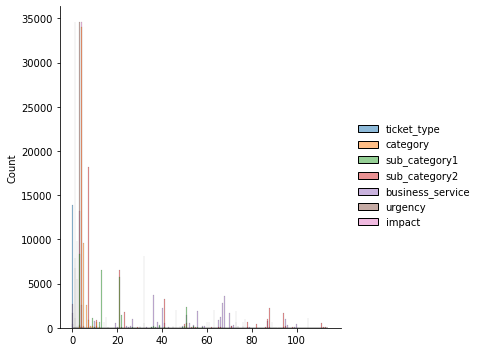

In [21]:
sns.displot(df)

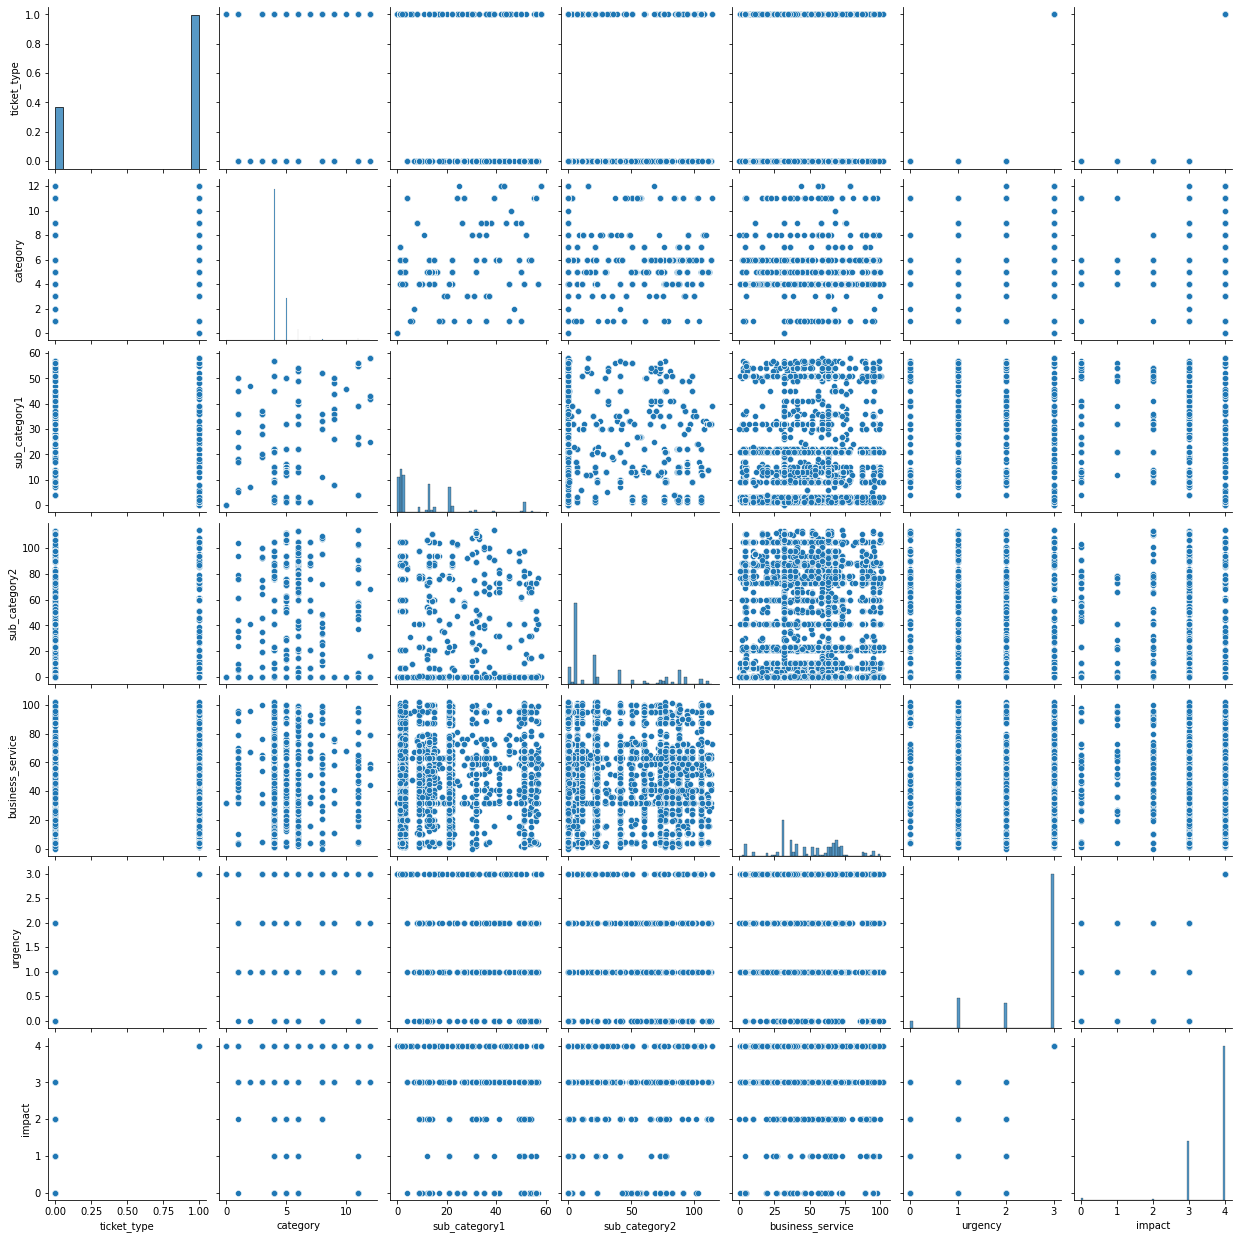

In [22]:
sns.pairplot(df)

In [29]:
def ff(x: int) -> str:
    if (x == 1):
        return "green"
    elif (x == 2):
        return "blue"
    elif (x == 3):
        return "orange"
    return "red"

color_encoding = df.category.map(ff)
color_encoding

0        red
1        red
2        red
3        red
4        red
        ... 
48544    red
48545    red
48546    red
48547    red
48548    red
Name: category, Length: 48549, dtype: object

In [24]:
color_encoding.value_counts()

yellow    48337
orange      137
red          72
blue          3
Name: category, dtype: int64

<Figure size 1080x1080 with 0 Axes>

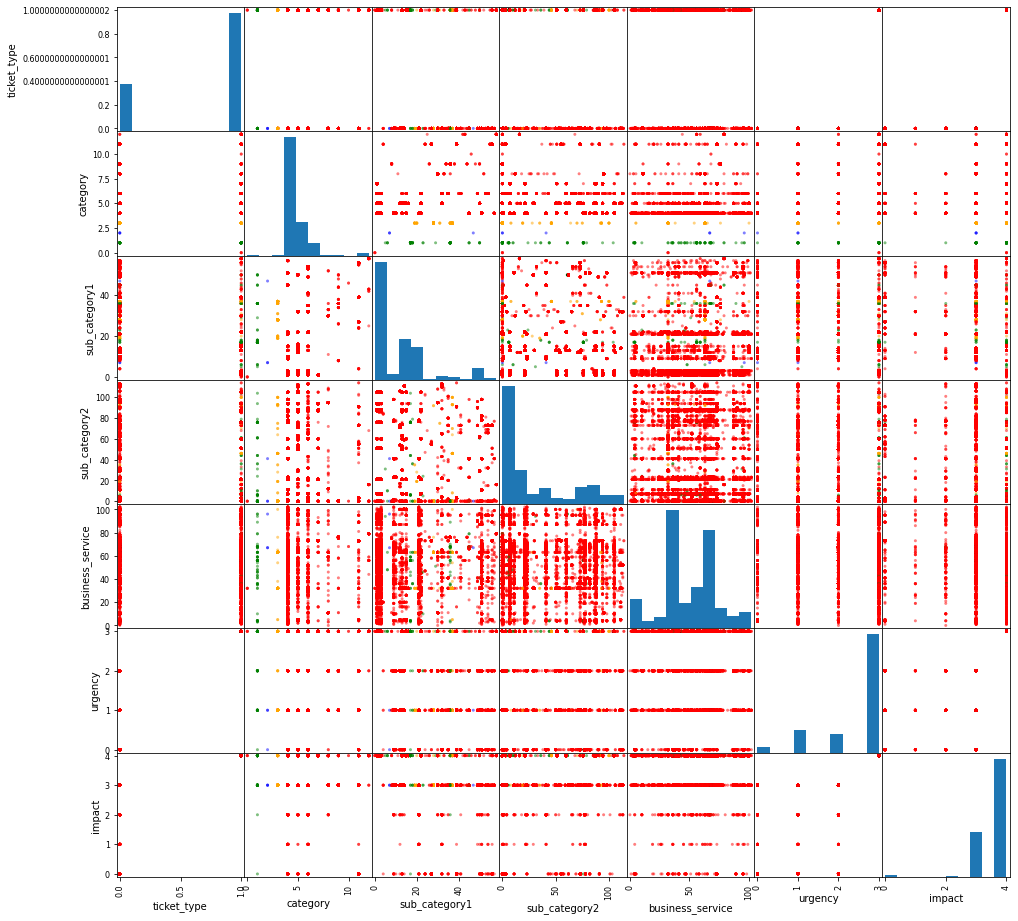

In [32]:
plt.figure(figsize=(15,15))
pd.plotting.scatter_matrix(df.iloc[:, 1:], c=color_encoding, figsize=(16,16))
plt.show()

<AxesSubplot:ylabel='Density'>

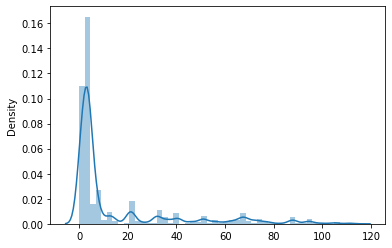

In [39]:
sns.distplot(df.iloc[:, 2:])

In [42]:
df.drop(["body"], inplace=True, axis=1)

In [55]:
df.columns

Index(['title', 'ticket_type', 'category', 'sub_category1', 'sub_category2',
       'business_service', 'urgency', 'impact'],
      dtype='object')

In [44]:
df.head()

,title,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,1,4,2,21,71,3,4
1,connection with icon,1,6,22,7,26,3,4
2,work experience user,1,5,13,7,32,3,4
3,requesting for meeting,1,5,13,7,32,3,4
4,reset passwords for external accounts,1,4,2,76,4,3,4


<AxesSubplot:>

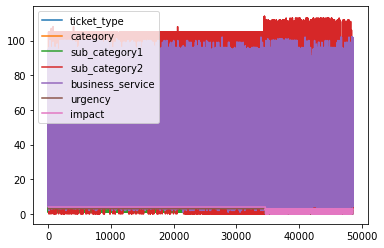

In [48]:
df.plot()

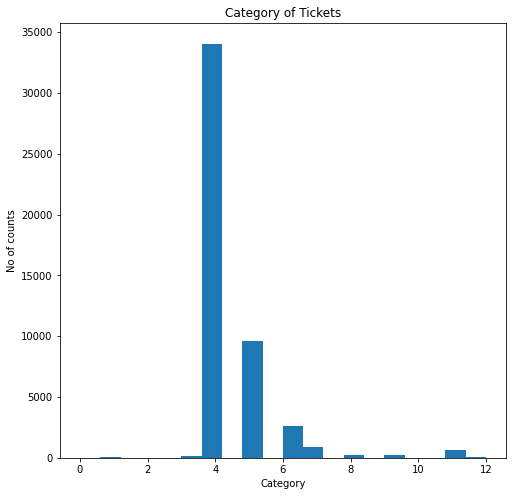

In [65]:
plt.figure(figsize=(8,8))
plt.hist(df.category,bins=20)
plt.title("Category of Tickets")
plt.xlabel("Category")
plt.ylabel("No of counts")
plt.show()

<AxesSubplot:>

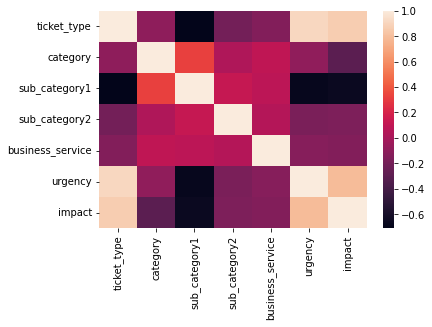

In [66]:
sns.heatmap(df.corr())

In [67]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

In [68]:
X = df.loc[:, ['ticket_type', 'sub_category1', 'sub_category2',
               'business_service', 'urgency', 'impact']]
y = df.category

In [69]:
model.fit(X, y)

ExtraTreesRegressor()

In [71]:
model.feature_importances_

array([0.04937219, 0.45831717, 0.06302251, 0.19086252, 0.01350489,
       0.22492072])

<AxesSubplot:ylabel='None'>

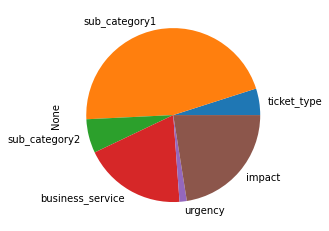

In [77]:
plt.figure()
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.plot(kind="pie")

<AxesSubplot:>

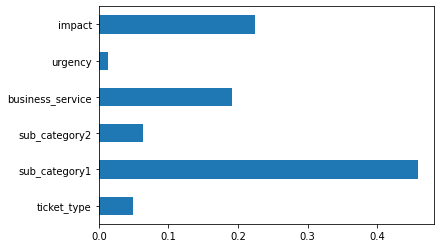

In [78]:
feat_importance.plot(kind="barh")

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [96]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [97]:
predictions_rf = rf.predict(X_test)

In [98]:
predictions_rf

array([ 4.        ,  4.        ,  4.        , ...,  5.        ,
       11.        ,  4.01055978])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='category', ylabel='Density'>

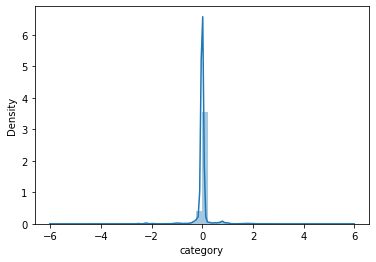

In [99]:
sns.distplot(Y_test - predictions_rf)

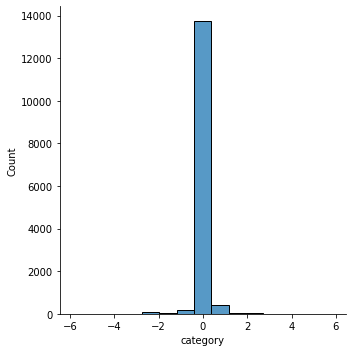

In [101]:
sns.displot(Y_test - predictions_rf)

In [103]:
rf.score(X_train, Y_train)

0.9474785018823261

In [106]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [107]:
from sklearn.model_selection import RandomizedSearchCV


In [108]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [109]:
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [110]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [111]:
predictions = rf_random.predict(X_test)

In [112]:
predictions

array([ 4.        ,  4.        ,  4.        , ...,  5.        ,
       11.        ,  4.00968475])

In [113]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='category', ylabel='Density'>

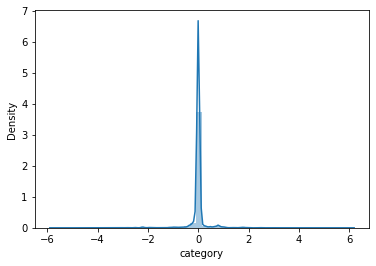

In [114]:
sns.distplot(Y_test - predictions)

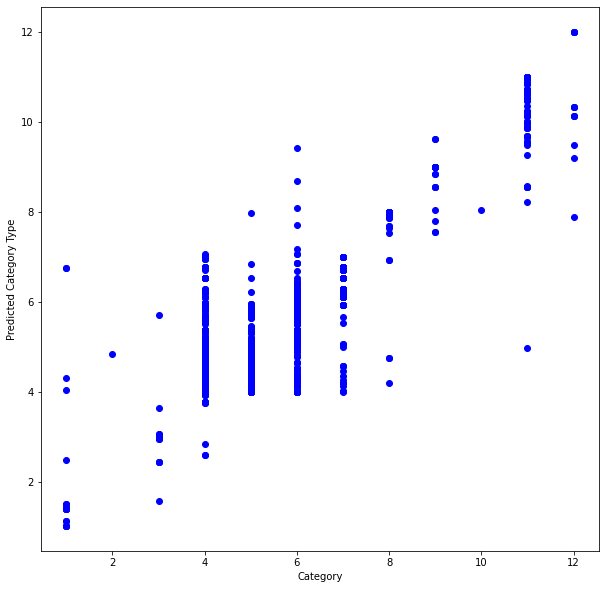

In [120]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, predictions, c='b')
plt.xlabel("Category")
plt.ylabel("Predicted Category Type")
plt.show()

In [ ]:
!pip3 freeze > requirements.txt